In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

df = fdr.DataReader('252670', '2020')
df.shape

(428, 6)

<AxesSubplot:xlabel='Date'>

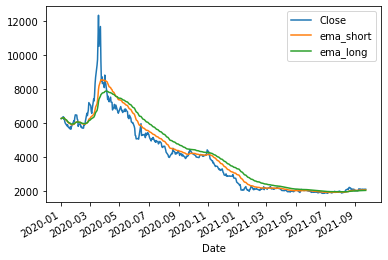

In [2]:
# 지수이동평균 구하기
# 단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점
# MACD에서는 지수이동평균 사용

short = 12
long = 26

df['ema_short'] = df['Close'].ewm(short).mean()
df['ema_long'] = df['Close'].ewm(long).mean()

df[['Close', 'ema_short', 'ema_long']].plot()

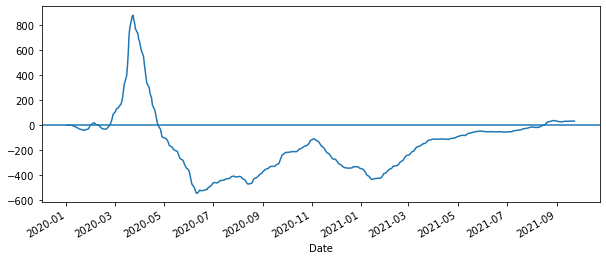

In [3]:
df['MACD'] = df['ema_short'] - df['ema_long']
df['MACD'].plot(figsize=(10,4))
plt.axhline(0)

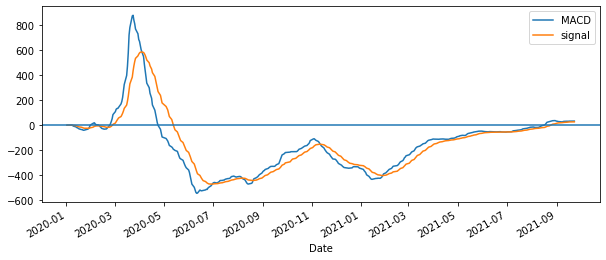

In [4]:
df['signal'] = df['MACD'].ewm(9).mean()
df[['MACD', 'signal']].plot(figsize=(10,4))
plt.axhline(0)

<BarContainer object of 428 artists>

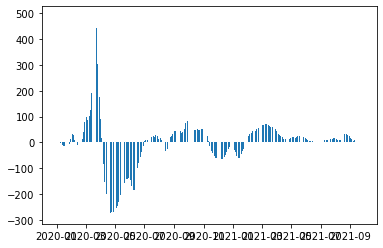

In [5]:
df['macdhist'] = df['MACD'] - df['signal']
# 날짜 보기가 힘듦 df['macdhist'].plot.bar()
plt.bar(df.index, df.macdhist)